In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

C:\Users\Svetlana\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


100%|█████████████████████████████████████████████████████████████████| 26421880/26421880 [00:20<00:00, 1311442.95it/s]


Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|████████████████████████████████████████████████████████████████████████| 29515/29515 [00:00<00:00, 377063.60it/s]


Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



100%|███████████████████████████████████████████████████████████████████| 4422102/4422102 [00:03<00:00, 1315159.01it/s]


Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|█████████████████████████████████████████████████████████████████████████| 5148/5148 [00:00<00:00, 7279931.55it/s]

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



In [9]:
loss_fn = nn.CrossEntropyLoss()

In [10]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [11]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)
        sum_loss += loss.item()

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [19]:
def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return correct, test_loss

In [48]:
def run_training(epochs, train_dataloader, model, loss_fn, optimizer):
    test_loss = []
    for t in range(epochs):
        print(f"Epoch {t+1}\n-------------------------------")
        sum_loss = train_loop(train_dataloader, model, loss_fn, optimizer)
        train_loss.append(sum_loss)

        acc, avg_loss = test_loop(test_dataloader, model, loss_fn)
        test_loss.append(avg_loss)
    print("Done!")
    
    return test_loss

In [49]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
learning_rate = 1e-3
batch_size = 64
epochs = 5

In [50]:
test_loss_sgd = run_training(epochs, train_dataloader, model, loss_fn, optimizer)

Epoch 1
-------------------------------
loss: 0.270989  [   64/60000]
loss: 0.362948  [ 6464/60000]
loss: 0.229244  [12864/60000]
loss: 0.379360  [19264/60000]
loss: 0.319152  [25664/60000]
loss: 0.353176  [32064/60000]
loss: 0.304867  [38464/60000]
loss: 0.418580  [44864/60000]
loss: 0.442949  [51264/60000]
loss: 0.347890  [57664/60000]
Test Error: 
 Accuracy: 85.9%, Avg loss: 0.389633 

Epoch 2
-------------------------------
loss: 0.221511  [   64/60000]
loss: 0.311758  [ 6464/60000]
loss: 0.209710  [12864/60000]
loss: 0.364977  [19264/60000]
loss: 0.308115  [25664/60000]
loss: 0.346503  [32064/60000]
loss: 0.306525  [38464/60000]
loss: 0.421079  [44864/60000]
loss: 0.430594  [51264/60000]
loss: 0.335855  [57664/60000]
Test Error: 
 Accuracy: 86.1%, Avg loss: 0.383205 

Epoch 3
-------------------------------
loss: 0.213693  [   64/60000]
loss: 0.306204  [ 6464/60000]
loss: 0.202028  [12864/60000]
loss: 0.355419  [19264/60000]
loss: 0.307100  [25664/60000]
loss: 0.345129  [32064/600

In [51]:
print(test_loss_sgd)

[0.38963310667283974, 0.38320457574668204, 0.37977952429443407, 0.37754955802373824, 0.3758986291422206]


In [52]:
model = NeuralNetwork()
optimizer = torch.optim.RMSprop(model.parameters(), lr = learning_rate, alpha = 0.9)
test_loss_rms = run_training(epochs, train_dataloader, model, loss_fn, optimizer)

Epoch 1
-------------------------------
loss: 2.299017  [   64/60000]
loss: 0.561404  [ 6464/60000]
loss: 0.464267  [12864/60000]
loss: 0.482081  [19264/60000]
loss: 0.479731  [25664/60000]
loss: 0.463993  [32064/60000]
loss: 0.374960  [38464/60000]
loss: 0.521036  [44864/60000]
loss: 0.493906  [51264/60000]
loss: 0.431683  [57664/60000]
Test Error: 
 Accuracy: 82.5%, Avg loss: 0.466934 

Epoch 2
-------------------------------
loss: 0.275227  [   64/60000]
loss: 0.337481  [ 6464/60000]
loss: 0.290373  [12864/60000]
loss: 0.337556  [19264/60000]
loss: 0.343578  [25664/60000]
loss: 0.383674  [32064/60000]
loss: 0.286450  [38464/60000]
loss: 0.419908  [44864/60000]
loss: 0.446033  [51264/60000]
loss: 0.404067  [57664/60000]
Test Error: 
 Accuracy: 85.2%, Avg loss: 0.415195 

Epoch 3
-------------------------------
loss: 0.222330  [   64/60000]
loss: 0.343819  [ 6464/60000]
loss: 0.214913  [12864/60000]
loss: 0.317007  [19264/60000]
loss: 0.323751  [25664/60000]
loss: 0.411305  [32064/600

In [53]:
test_loss_rms

[0.4669338763709281,
 0.4151948234837526,
 0.3936103121110588,
 0.4195809263712282,
 0.44202277605321]

In [ ]:
# Постройте графики зависимости сходимости (значение функции потерь от количества итераций работы алгоритма)
# от выбора оптимизационного метода
# количество эпох = 50
# Сравните, сделайте выводы
# https://pytorch.org/docs/stable/optim.html

In [4]:
from torchvision import datasets
from torchvision.transforms import ToTensor

def get_data(is_train, path = 'data', transform = ToTensor()):
    return datasets.FashionMNIST(
                root=path,
                train=is_train,
                download=True,
                transform=transform
            )

In [5]:
BATCH_SIZE = 64

LEARNING_RATE = 1E-3
EPOCHS = 50

In [6]:
from torch import nn

class NeuralNetwork(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [7]:
def train_loop(dataloader, model, loss_fn, optimizer):

    size = len(dataloader.dataset)
    model.train()
    sum_loss = 0

    for batch, (X, y) in enumerate(dataloader):

        pred = model(X)
        loss = loss_fn(pred, y)
        sum_loss += loss.item()

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            current = batch * len(X)
            print(f'loss: {loss.item():>7f}  [{current:>5d}/{size:>5d}]')
            
    return sum_loss / len(dataloader)

In [8]:
from torch import no_grad, float

def test_loop(dataloader, model, loss_fn):

    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with no_grad():

        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(float).sum().item()

    test_loss /= num_batches
    correct /= size

    print(f'Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n')

    return test_loss

In [9]:
def run_training(epochs, train_dataloader, test_dataloader, model, loss_fn, optimizer):

    test_losses = []

    for t in range(epochs):
        
        print(f'Epoch {t+1}\n-------------------------------')
        train_loss = train_loop(train_dataloader, model, loss_fn, optimizer)
        test_loss = test_loop(test_dataloader, model, loss_fn)
        test_losses.append(test_loss)

    print('Done!')

    return test_losses

In [10]:
training_data = get_data(is_train=True)
test_data = get_data(is_train=False)

100.0%


Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



100.0%


Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



100.0%


Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



100.0%

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



In [11]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=BATCH_SIZE)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE)

In [12]:
from torch.optim import SGD, RMSprop, Adam

model = NeuralNetwork()
optimizer_sgd = SGD(model.parameters(), lr=LEARNING_RATE)
print('Training with SGD optimizer')
test_loss_sgd = run_training(EPOCHS, train_dataloader, test_dataloader, model, nn.CrossEntropyLoss(), optimizer_sgd)

Training with SGD optimizer
Epoch 1
-------------------------------
loss: 2.309649  [    0/60000]
loss: 2.295604  [ 6400/60000]
loss: 2.277244  [12800/60000]
loss: 2.269981  [19200/60000]
loss: 2.246638  [25600/60000]
loss: 2.217713  [32000/60000]
loss: 2.229088  [38400/60000]
loss: 2.193276  [44800/60000]
loss: 2.187989  [51200/60000]
loss: 2.150435  [57600/60000]
Test Error: 
 Accuracy: 33.0%, Avg loss: 2.151453 

Epoch 2
-------------------------------
loss: 2.160841  [    0/60000]
loss: 2.152802  [ 6400/60000]
loss: 2.097729  [12800/60000]
loss: 2.110353  [19200/60000]
loss: 2.051864  [25600/60000]
loss: 1.991103  [32000/60000]
loss: 2.019284  [38400/60000]
loss: 1.938333  [44800/60000]
loss: 1.941344  [51200/60000]
loss: 1.858865  [57600/60000]
Test Error: 
 Accuracy: 50.2%, Avg loss: 1.867191 

Epoch 3
-------------------------------
loss: 1.896194  [    0/60000]
loss: 1.870070  [ 6400/60000]
loss: 1.761198  [12800/60000]
loss: 1.795833  [19200/60000]
loss: 1.680616  [25600/60000

In [13]:
model = NeuralNetwork()
optimizer_rms = RMSprop(model.parameters(), lr=LEARNING_RATE, alpha=0.9)
print('Training with RMSprop optimizer')
test_loss_rms = run_training(EPOCHS, train_dataloader, test_dataloader, model, nn.CrossEntropyLoss(), optimizer_rms)

Training with RMSprop optimizer
Epoch 1
-------------------------------
loss: 2.304848  [    0/60000]
loss: 0.567077  [ 6400/60000]
loss: 0.458286  [12800/60000]
loss: 0.476768  [19200/60000]
loss: 0.479818  [25600/60000]
loss: 0.449483  [32000/60000]
loss: 0.402805  [38400/60000]
loss: 0.540564  [44800/60000]
loss: 0.543736  [51200/60000]
loss: 0.418242  [57600/60000]
Test Error: 
 Accuracy: 82.7%, Avg loss: 0.463181 

Epoch 2
-------------------------------
loss: 0.263991  [    0/60000]
loss: 0.310857  [ 6400/60000]
loss: 0.288106  [12800/60000]
loss: 0.353036  [19200/60000]
loss: 0.372366  [25600/60000]
loss: 0.423744  [32000/60000]
loss: 0.273136  [38400/60000]
loss: 0.418639  [44800/60000]
loss: 0.477200  [51200/60000]
loss: 0.346652  [57600/60000]
Test Error: 
 Accuracy: 83.9%, Avg loss: 0.448695 

Epoch 3
-------------------------------
loss: 0.263917  [    0/60000]
loss: 0.343531  [ 6400/60000]
loss: 0.238238  [12800/60000]
loss: 0.300627  [19200/60000]
loss: 0.335087  [25600/6

In [14]:
model = NeuralNetwork()
optimizer_adam = Adam(model.parameters(), lr=LEARNING_RATE)
print('Training with Adam optimizer')
test_loss_adam = run_training(EPOCHS, train_dataloader, test_dataloader, model, nn.CrossEntropyLoss(), optimizer_adam)

Training with Adam optimizer
Epoch 1
-------------------------------
loss: 2.301422  [    0/60000]
loss: 0.548555  [ 6400/60000]
loss: 0.389075  [12800/60000]
loss: 0.500644  [19200/60000]
loss: 0.454735  [25600/60000]
loss: 0.418690  [32000/60000]
loss: 0.373866  [38400/60000]
loss: 0.517314  [44800/60000]
loss: 0.508118  [51200/60000]
loss: 0.505296  [57600/60000]
Test Error: 
 Accuracy: 84.6%, Avg loss: 0.419175 

Epoch 2
-------------------------------
loss: 0.267831  [    0/60000]
loss: 0.350734  [ 6400/60000]
loss: 0.283497  [12800/60000]
loss: 0.393177  [19200/60000]
loss: 0.415467  [25600/60000]
loss: 0.359057  [32000/60000]
loss: 0.298738  [38400/60000]
loss: 0.485040  [44800/60000]
loss: 0.393146  [51200/60000]
loss: 0.463166  [57600/60000]
Test Error: 
 Accuracy: 85.3%, Avg loss: 0.392232 

Epoch 3
-------------------------------
loss: 0.214054  [    0/60000]
loss: 0.312664  [ 6400/60000]
loss: 0.248477  [12800/60000]
loss: 0.332090  [19200/60000]
loss: 0.397017  [25600/6000

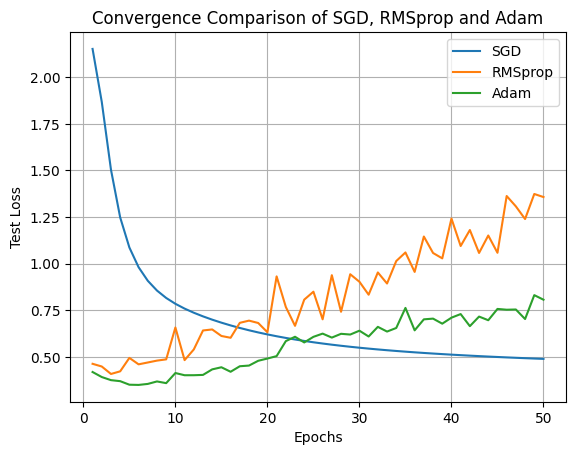

In [15]:
import matplotlib.pyplot as plt

plt.plot(range(1, EPOCHS + 1), test_loss_sgd, label='SGD')
plt.plot(range(1, EPOCHS + 1), test_loss_rms, label='RMSprop')
plt.plot(range(1, EPOCHS + 1), test_loss_adam, label='Adam')
plt.xlabel('Epochs')
plt.ylabel('Test Loss')
plt.title('Convergence Comparison of SGD, RMSprop and Adam')
plt.grid(True)
plt.legend()
plt.show()